# Cross-Validation:
    
It is technique used in ML to evaluate the performance of a model on unseen data.

It is used for preventing overfitting.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("C:\\Users\\user\\Datasets\BostonHousing.csv")
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
x=df.drop(columns=["medv"],axis=1)
y=df["medv"]
from sklearn.preprocessing import StandardScaler

In [5]:
st=StandardScaler()
x_sct=st.fit_transform(x)
x_sc=pd.DataFrame(x_sct,columns=x.columns)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x_sc,y,test_size=0.33,random_state=42)

In [8]:
from sklearn.tree import DecisionTreeRegressor

In [9]:
dr=DecisionTreeRegressor()

In [10]:
dr.fit(x_train,y_train)

DecisionTreeRegressor()

In [11]:
y_pred=dr.predict(x_test)

In [12]:
from sklearn.metrics import r2_score

In [13]:
score=r2_score(y_test,y_pred)

In [14]:
print(score)

0.7537732672455206


In [15]:
dr=DecisionTreeRegressor()

In [16]:
parameters={
    'criterion':['squared','friedman_mse','absolute_error','poisson'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5,6,7,8,10,11,12,20,30],
    'max_features':['auto','sqrt','log2']
}

In [17]:
from sklearn.model_selection import GridSearchCV 

In [18]:
gd=GridSearchCV(dr,param_grid=parameters,cv=5,scoring='neg_mean_squared_error')

In [19]:
gd.fit(x_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
780 fits failed out of a total of 1560.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
390 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\Lib\site-packa

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 20,
                                       30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [20]:
gd.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 7,
 'max_features': 'log2',
 'splitter': 'best'}

In [21]:
y_pred=gd.predict(x_test)

In [22]:
score=r2_score(y_pred,y_test)

In [23]:
print(score)

0.7558125541107442


# Ensemble Learning:

It is ML technique that combines multiple predictions from multiple models to obtain better performance than a single model

There are two types of EL:
    
    1. Bagging(Bootstrap)
    
    2. Boosting

# 1. Bagging:

It is a EL technique used to improve stabiltiy and accuracy of model.

It decreases variance and used to avoid overfitting.

In this different multiple models takes sample data and predict output and avg. of all predictions considered as final predictions.

Example: Random Forest 


# 2. Boosting:

It is EL technique used to reduce variance.

In this it create strong classifier by combining weak classifiers.

The process involves building model sequentially, where each new model aims to correct the errors made by previous ones.

Example: Adaboost,GradientBoost,xgboost,etc.

# Random Forest Regression and Classifier:

It works on both Regression and classifier.

It works by creating number of decision trees during the training phase.



In [42]:
import numpy as np
import pandas as pd

In [43]:
df=pd.read_csv("C:\\Users\\user\\Datasets\Titanic.csv")

In [44]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [45]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [46]:
df['Cabin'].isnull().sum()/df['Cabin'].shape[0]
df['Age'].isnull().sum()/df['Age'].shape[0]

0.20574162679425836

In [47]:
df=df.drop(columns=['Cabin','Name'],axis=1)

In [64]:
from sklearn.impute import SimpleImputer
si=SimpleImputer(strategy='mean')
df['Age']=si.fit_transform(df[['Age']])
df['Fare']=si.fit_transform(df[['Fare']])

In [65]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    int64  
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    int32  
dtypes: float64(2), int32(1), int64(7)
memory usage: 31.2 KB


PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [66]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df['Sex']=lb.fit_transform(df['Sex'])
df['Ticket']=lb.fit_transform(df['Ticket'])
df['Embarked']=lb.fit_transform(df['Embarked'])

In [67]:
x=df.drop(columns=['Survived'],axis=1)
y=df['Survived']

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [72]:
y_pred=rf.predict(x_test)

In [73]:
from sklearn.metrics import accuracy_score

In [74]:
accuracy=accuracy_score(y_pred,y_test)

In [75]:
accuracy

1.0

In [86]:
n_estimators=[1,2,4,8,16,32,64,100,200]

test_results={}
for i in n_estimators:
    rf=RandomForestClassifier(n_estimators=i)
    rf.fit(x_train,y_train)

    y_pred=rf.predict(x_test)
    test_results[i]=accuracy_score(y_pred,y_test)*100

In [87]:
print(test_results)

{1: 100.0, 2: 94.92753623188406, 4: 100.0, 8: 100.0, 16: 100.0, 32: 100.0, 64: 100.0, 100: 100.0, 200: 100.0}


# K-Means Clustering:

It is a unsupervised ML which groups the unlabled dataset into different clusters



In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [89]:
df=pd.read_csv("C:\\Users\\user\\Datasets\mall.csv")

In [90]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [91]:
df = df.drop(columns = ['CustomerID' , 'Genre' ])

In [92]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [93]:
x = df.iloc[: , [0,1]].values

In [95]:
from sklearn.cluster import KMeans

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

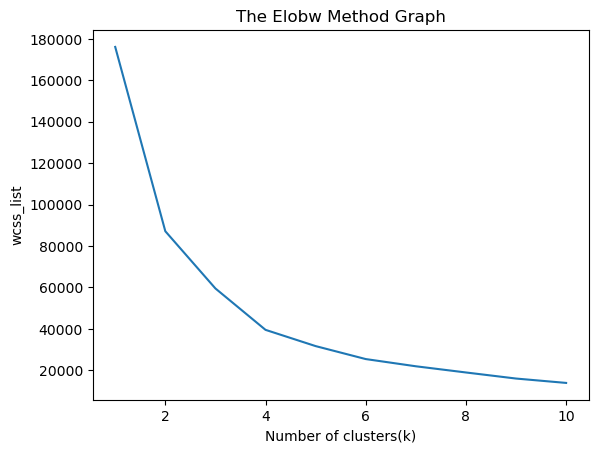

In [96]:
a = [] 

for i in range(1,11):
    b = KMeans(n_clusters = i , init = 'k-means++' , random_state = 42) 
    b.fit(x) 
    a.append(b.inertia_)
    
plt.plot(range(1,11) , a) 

plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()

In [103]:
b = KMeans(n_clusters=4, init='k-means++', random_state= 42)  
y_predict= b.fit_predict(x) 

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


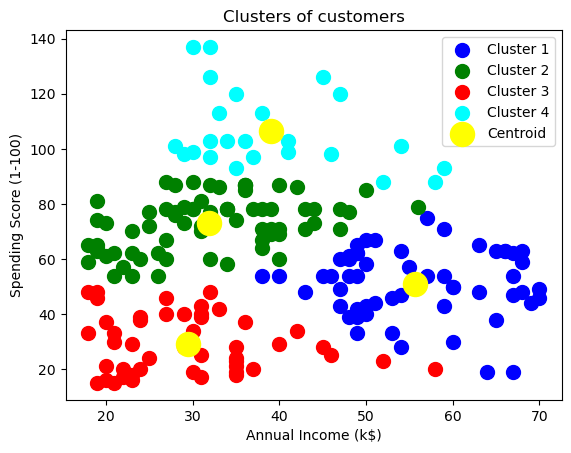

In [104]:
#visulaizing the clusters  
plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
plt.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
plt.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster  
 
plt.scatter(b.cluster_centers_[:, 0], b.cluster_centers_[:, 1], s = 300, c = 'yellow', 
            label = 'Centroid')   
plt.title('Clusters of customers')  
plt.xlabel('Annual Income (k$)')  
plt.ylabel('Spending Score (1-100)')  
plt.legend()  
plt.show() 